In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #plot styling
import numpy as np

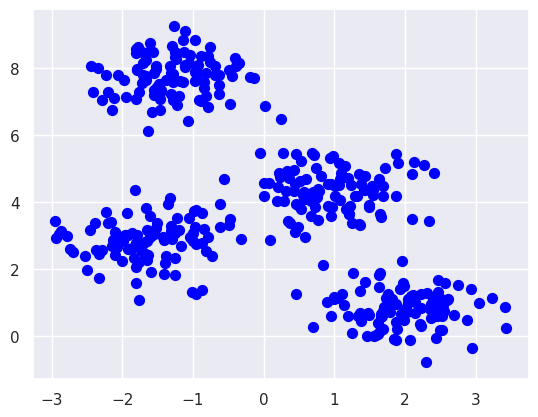

In [ ]:
from sklearn.datasets import make_blobs
X,y_true=make_blobs(n_samples=400,centers=4,cluster_std=0.60,random_state=0)
plt.scatter(X[:,0],X[:,1],s=50,color='blue');

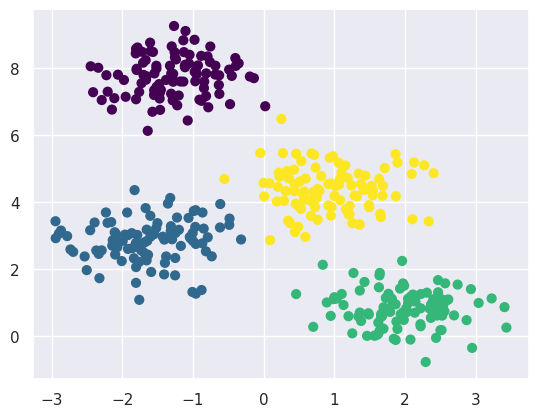

In [ ]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=4).fit(X)
labels=gmm.predict(X)
plt.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='viridis');

In [ ]:
probs=gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.469 0.    0.    0.531]
 [0.    1.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    1.    0.    0.   ]]


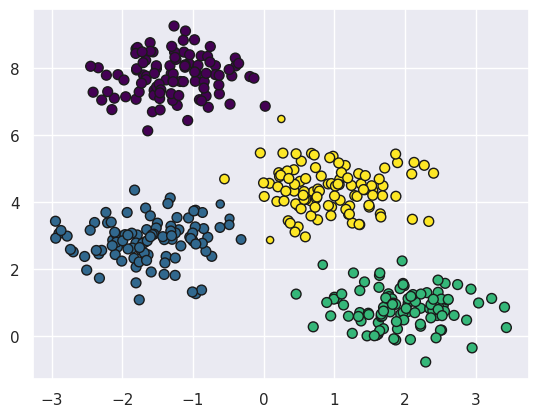

In [ ]:
#print(probs.max(1))

size=probs.max(1)/0.02
plt.scatter(X[:,0],X[:,1],c=labels,edgecolor='k',cmap='viridis',s=size);

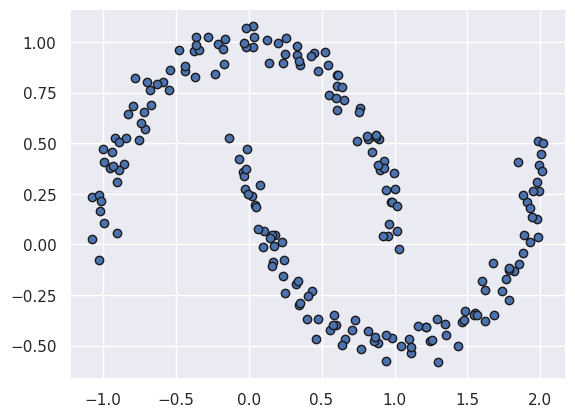

In [ ]:
from sklearn.datasets import make_moons
Xmoon,ymoon=make_moons(200,noise=.05,random_state=0)
plt.scatter(Xmoon[:,0],Xmoon[:,1],edgecolor='k');

In [ ]:
from matplotlib.patches import Ellipse
def draw_ellipse(position, covariance, ax=None, **kwargs):
  #"""Draw an ellipse with a given position and covariance"""
  ax = ax or plt.gca()
  # Convert covariance to principal axes
  if covariance.shape == (2, 2):
    U, s, Vt = np.linalg.svd(covariance)
    angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    width, height = 2 * np.sqrt(s)
  else:
    angle = 0
    width, height = 2 * np.sqrt(covariance)
    # Draw the Ellipse
  for nsig in range(1, 4):
    ax.add_patch(Ellipse(position, nsig * width, nsig * height,angle, **kwargs))
def plot_gmm(gmm, X, label=True, ax=None):
  ax = ax or plt.gca()
  labels = gmm.fit(X).predict(X)
  if label:
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis',zorder=2,edgecolor='k')
  else:
    ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2,cmap='viridis',edgecolor='k')
    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
      draw_ellipse(pos, covar, alpha=w * w_factor)
      gmm = GaussianMixture(n_components=4, covariance_type='full',random_state=42)
      plt_gmm(gmm, X_stretched)

In [ ]:
gmm2=GaussianMixture(n_components=2,covariance_type='full',random_state=0)
plt.figure(figsize=(8,5))
plt.gmm(gmm2, Xmoon)

AttributeError: ignored

<Figure size 800x500 with 0 Axes>